In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
import chart_studio.plotly as py
import cufflinks as cf
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
cf.go_offline()

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [19]:
def Data_read(name):
    temp = pd.read_csv('data/Data_30_'+ name + ".csv",index_col = [0])
    temp.columns = ['기온','현지기압','풍속','일일 누적강수량','해면기압','일일 누적일사량','습도','풍향']
    return temp

def visualize(data,name):
    Columns = ['기온','현지기압','풍속','일일 누적강수량','해면기압','일일 누적일사량','습도','풍향']
    data.iloc[:,Columns.index(name)].iplot(kind = 'scatter',xTitle = 'time',yTitle = name,title = '30일치 A 위치')

def merge(data,data2):
    temp_data = pd.merge(data,data2,left_index = True,right_index = True)
    return temp_data

def Descending_correlation(data):
    temp = data.corr().iloc[:8,8:]
    temp2 = temp.copy()
    temp2 = abs(temp).sort_values(by = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09',
       'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17'],ascending = False)
    return temp2

with open('data/Data_T_Y.pk','rb') as f:
    Data_Label = pickle.load(f)

In [20]:
def Graph(data):
    plt.subplot(8,1,1)
    visualize(data,'기온')
    visualize(data,'현지기압')
    visualize(data,'풍속')
    visualize(data,'일일 누적강수량')
    visualize(data,'해면기압')
    visualize(data,'일일 누적일사량')
    visualize(data,'습도')
    visualize(data,'풍향')

### 30일치 데이터 보자

In [21]:
Data_30_A = Data_read('A')

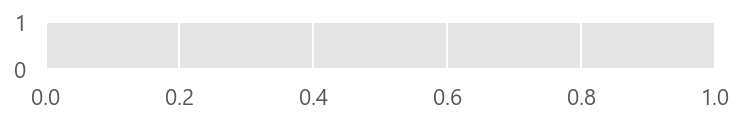

In [22]:
Graph(Data_30_A)

##### label과 비교

In [23]:
Data_A_with_label = merge(Data_30_A,Data_Label)

In [25]:
Data_A_with_label.head()

,기온,현지기압,풍속,일일 누적강수량,해면기압,일일 누적일사량,습도,풍향,Y00,Y01,...,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
id,,,,,,,,,,,,,,,,,,,,,
0,9.7,988.8,1.2,0.0,1009.3,0.0,82.4,71.3,12.5,11.5,...,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0
1,9.3,988.9,1.7,0.0,1009.3,0.0,81.2,121.8,12.5,11.0,...,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0
2,9.4,989.0,1.1,0.0,1009.2,0.0,86.1,232.0,12.0,11.0,...,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5
3,9.4,988.9,1.5,0.0,1009.2,0.0,87.7,0.0,12.0,11.0,...,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5
4,9.2,988.9,0.8,0.0,1009.2,0.0,88.9,0.0,12.0,10.5,...,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5


In [33]:
Descending_correlation(Data_A_with_label)

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
기온,0.912809,0.951641,0.954500,0.729502,0.728564,0.906096,0.840827,0.746129,0.902829,0.947931,0.945833,0.933180,0.825280,0.951228,0.911123,0.925800,0.923968,0.911654
습도,0.780475,0.861934,0.861339,0.620695,0.622560,0.824676,0.762484,0.710088,0.823598,0.845464,0.846281,0.858770,0.758795,0.842948,0.838516,0.823722,0.832704,0.841793
일일 누적일사량,0.699753,0.643277,0.640743,0.762842,0.764646,0.476740,0.299419,0.231234,0.519394,0.473793,0.504530,0.501966,0.283233,0.549640,0.602172,0.428754,0.414144,0.425565
풍속,0.194404,0.221586,0.220641,0.139700,0.138154,0.217884,0.216007,0.217875,0.227124,0.241849,0.247088,0.262543,0.189030,0.236501,0.224425,0.232529,0.218184,0.238439
일일 누적강수량,0.190447,0.164823,0.166481,0.229015,0.229971,0.151146,0.154077,0.159285,0.119175,0.121652,0.122650,0.115254,0.164212,0.151304,0.156865,0.153884,0.147818,0.144852
해면기압,0.070692,0.090715,0.080891,0.020963,0.026206,0.067757,0.027189,0.057675,0.107169,0.072905,0.080399,0.091581,0.035797,0.073360,0.109260,0.027569,0.028577,0.048998
현지기압,0.025913,0.055026,0.044003,0.020756,0.015568,0.036818,0.050416,0.076166,0.074688,0.042439,0.050392,0.062122,0.057221,0.037311,0.073472,0.002593,0.000700,0.021005
풍향,0.016494,0.008163,0.002842,0.038236,0.038181,0.003827,0.026714,0.038510,0.005830,0.025190,0.014479,0.020121,0.007975,0.006669,0.004989,0.022137,0.011712,0.025039


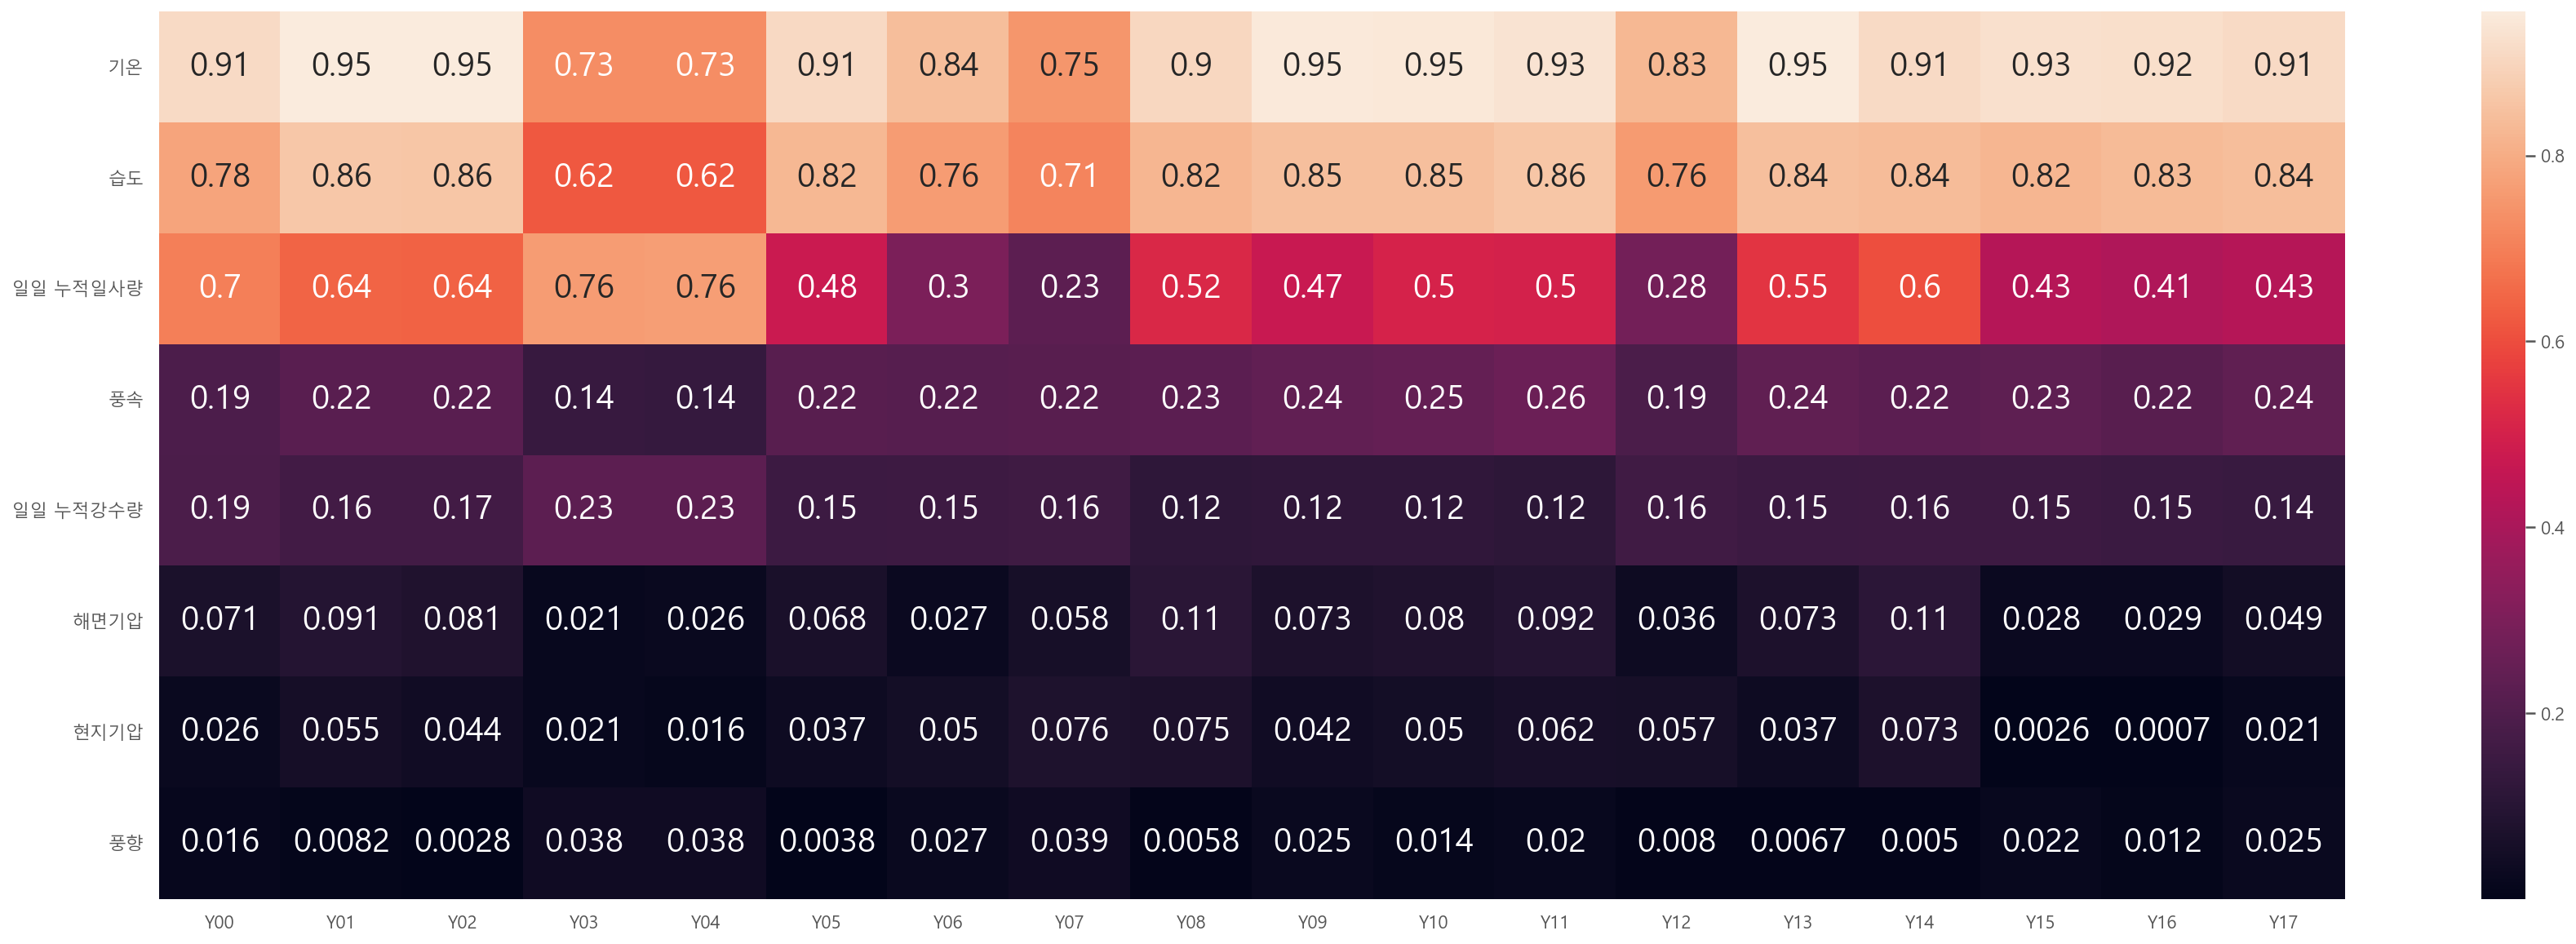

In [34]:
plt.figure(figsize = (30,10))
sns.heatmap(Descending_correlation(Data_A_with_label),annot = True,annot_kws={'size':20}).set_ylim(7.5+0.5,0.5-0.5)
plt.show()

Text(0, 0.5, '풍향')

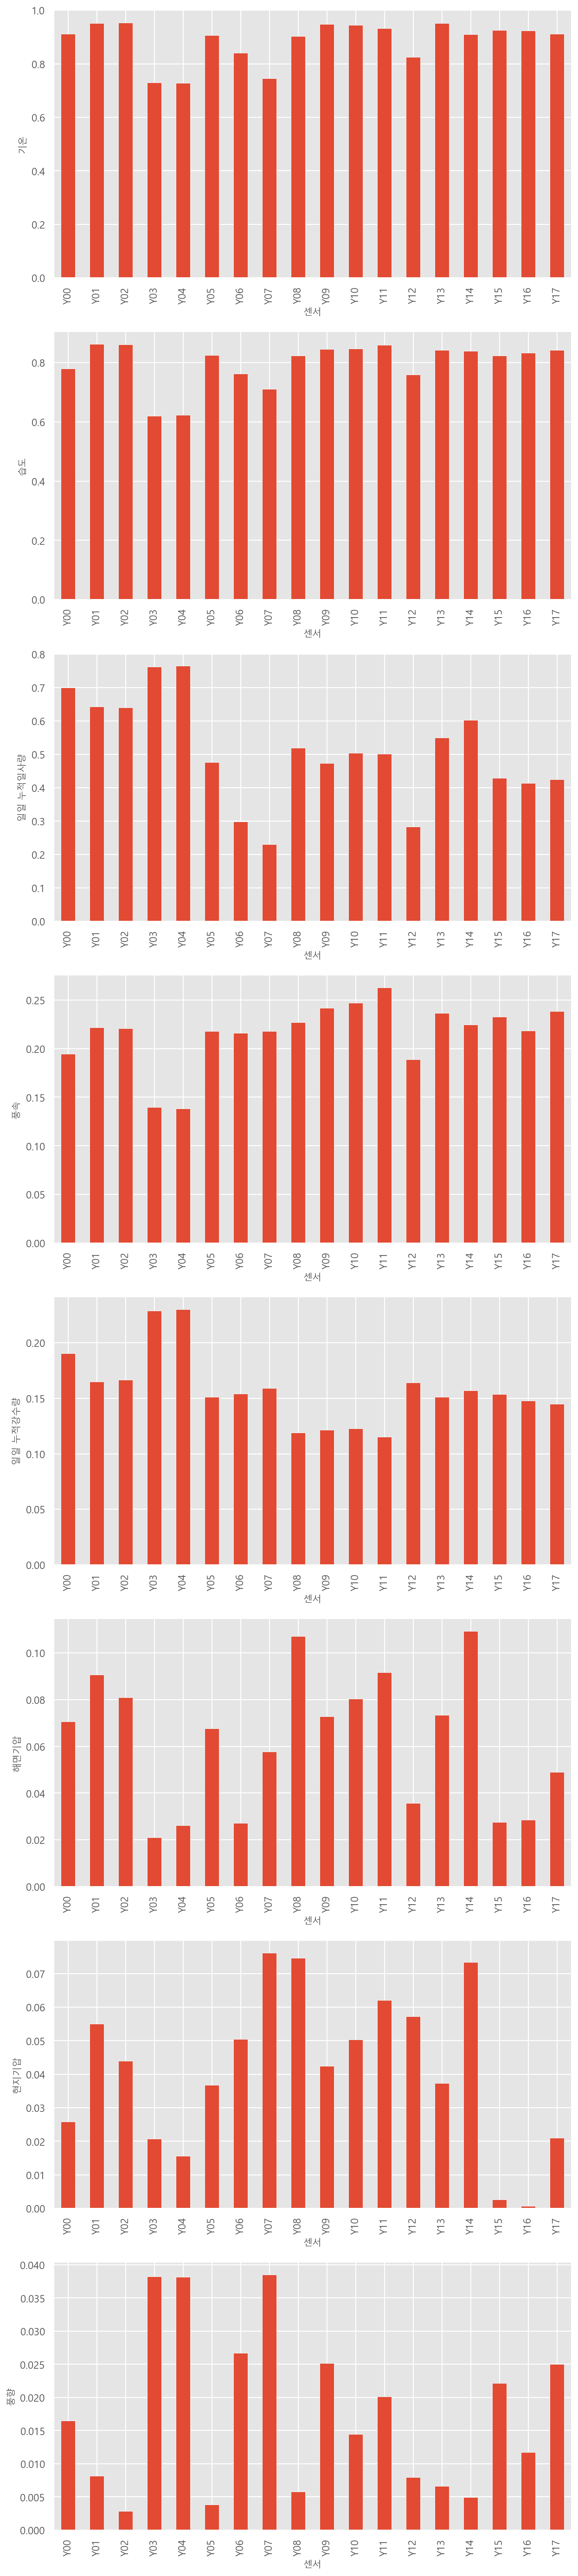

In [32]:
# 기압이 낮으면 높은지역임.
plt.figure(figsize = (10,50))
plt.subplot(8,1,1)
temp_data2.iloc[:,0].plot(kind = 'bar')
plt.xlabel('센서',fontsize = 10)
plt.ylabel('기온',fontsize = 10)
plt.subplot(8,1,2)
temp_data2.iloc[:,1].plot(kind = 'bar')
plt.xlabel('센서',fontsize = 10)
plt.ylabel('습도',fontsize = 10)
plt.subplot(8,1,3)
temp_data2.iloc[:,2].plot(kind = 'bar')
plt.xlabel('센서',fontsize = 10)
plt.ylabel('일일 누적일사량',fontsize = 10)
plt.subplot(8,1,4)
temp_data2.iloc[:,3].plot(kind = 'bar')
plt.xlabel('센서',fontsize = 10)
plt.ylabel('풍속',fontsize = 10)
plt.subplot(8,1,5)
temp_data2.iloc[:,4].plot(kind = 'bar')
plt.xlabel('센서',fontsize = 10)
plt.ylabel('일일 누적강수량',fontsize = 10)
plt.subplot(8,1,6)
temp_data2.iloc[:,5].plot(kind = 'bar')
plt.xlabel('센서',fontsize = 10)
plt.ylabel('해면기압',fontsize = 10)
plt.subplot(8,1,7)
temp_data2.iloc[:,6].plot(kind = 'bar')
plt.xlabel('센서',fontsize = 10)
plt.ylabel('현지기압',fontsize = 10)
plt.subplot(8,1,8)
temp_data2.iloc[:,7].plot(kind = 'bar')
plt.xlabel('센서',fontsize = 10)
plt.ylabel('풍향',fontsize = 10)

##### con)